In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("Imatra Teppanala 5.3.2024 - 19.4.2024_fd3edaa8-d673-4a15-9baa-69be3bddf7df.csv")

In [8]:
df.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Hengitettävät hiukkaset <10 µm [µg/m3],Pienhiukkaset <2.5 µm [µg/m3]
0,Imatra Teppanala,2024,3,5,00:00,3.5,2.5
1,Imatra Teppanala,2024,3,5,01:00,3.8,1.3
2,Imatra Teppanala,2024,3,5,02:00,3.9,2
3,Imatra Teppanala,2024,3,5,03:00,3.6,1.8
4,Imatra Teppanala,2024,3,5,04:00,9.7,3.2


In [9]:
import matplotlib.pyplot as plt

In [11]:
# Tyhjät arvot NaN arvoiksi
import numpy as np
# Muunetaan "-" NaN arvoksi
df = df.replace('-',np.NaN)
df["Date"] = df["Vuosi"].astype(str) + "-" + df["Kuukausi"].astype(str) + "-" +  df["Päivä"].astype(str) + " " + df["Aika [UTC]"]
df["Date"] = pd.to_datetime(df["Date"])
df["Hengitettävät hiukkaset <10 µm [µg/m3]"] = df["Hengitettävät hiukkaset <10 µm [µg/m3]"].astype(float)
df["Pienhiukkaset <2.5 µm [µg/m3]"] = df["Pienhiukkaset <2.5 µm [µg/m3]"].astype(float)
df.dtypes

Havaintoasema                                     object
Vuosi                                              int64
Kuukausi                                           int64
Päivä                                              int64
Aika [UTC]                                        object
Hengitettävät hiukkaset <10 µm [µg/m3]           float64
Pienhiukkaset <2.5 µm [µg/m3]                    float64
Date                                      datetime64[ns]
dtype: object

In [12]:
df.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Hengitettävät hiukkaset <10 µm [µg/m3],Pienhiukkaset <2.5 µm [µg/m3],Date
0,Imatra Teppanala,2024,3,5,00:00,3.5,2.5,2024-03-05 00:00:00
1,Imatra Teppanala,2024,3,5,01:00,3.8,1.3,2024-03-05 01:00:00
2,Imatra Teppanala,2024,3,5,02:00,3.9,2.0,2024-03-05 02:00:00
3,Imatra Teppanala,2024,3,5,03:00,3.6,1.8,2024-03-05 03:00:00
4,Imatra Teppanala,2024,3,5,04:00,9.7,3.2,2024-03-05 04:00:00


In [13]:
print(f"Tyhjien rivien määrä: {len(df[df['Hengitettävät hiukkaset <10 µm [µg/m3]'].isna()])}")
print(f"Rivien määrä: {len(df)}")
print(f"Tyhjät rivit: {((len(df[df['Hengitettävät hiukkaset <10 µm [µg/m3]'].isna()]) / len(df)) * 100)}%")
# Huomattava määrä tyhjiä rivejä

Tyhjien rivien määrä: 173
Rivien määrä: 1092
Tyhjät rivit: 15.842490842490841%


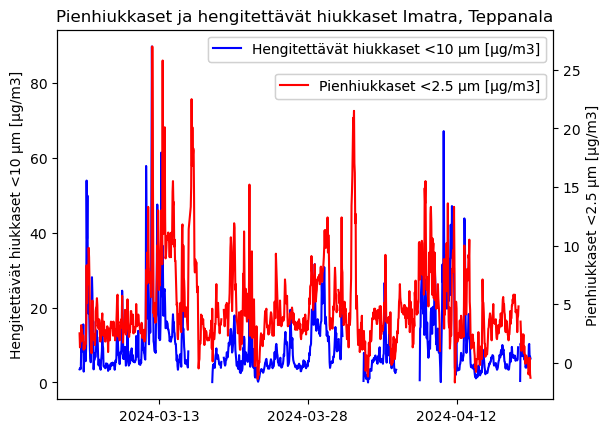

In [45]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df["Date"], df["Hengitettävät hiukkaset <10 µm [µg/m3]"], color="blue", label="Hengitettävät hiukkaset <10 µm [µg/m3]")
ax2.plot(df["Date"], df["Pienhiukkaset <2.5 µm [µg/m3]"], color="red", label="Pienhiukkaset <2.5 µm [µg/m3]")

legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
legend2 = ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

ax1.add_artist(legend1)
ax2.add_artist(legend2)

ax1.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax2.set_ylabel("Pienhiukkaset <2.5 µm [µg/m3]")

# ax1.set_ylim(0,100)
# ax2.set_ylim(0,30)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(4))

plt.title("Pienhiukkaset ja hengitettävät hiukkaset Imatra, Teppanala")
plt.show()

In [59]:
#Tarkistetaan poikkeuksellisten arvojen varalta

print(df["Hengitettävät hiukkaset <10 µm [µg/m3]"].min())
print(df["Hengitettävät hiukkaset <10 µm [µg/m3]"].max())
#Tuottaa jostain syystä negatiivisia arvoja
print(df["Pienhiukkaset <2.5 µm [µg/m3]"].min())
print(df["Pienhiukkaset <2.5 µm [µg/m3]"].max())

#NaN arvoille 
pearson = df[["Hengitettävät hiukkaset <10 µm [µg/m3]", "Pienhiukkaset <2.5 µm [µg/m3]"]].corr(method="pearson")
kendall = df[["Hengitettävät hiukkaset <10 µm [µg/m3]", "Pienhiukkaset <2.5 µm [µg/m3]"]].corr(method="kendall")
spearman = df[["Hengitettävät hiukkaset <10 µm [µg/m3]", "Pienhiukkaset <2.5 µm [µg/m3]"]].corr(method="spearman")

0.0
89.7
-1.7
27.0


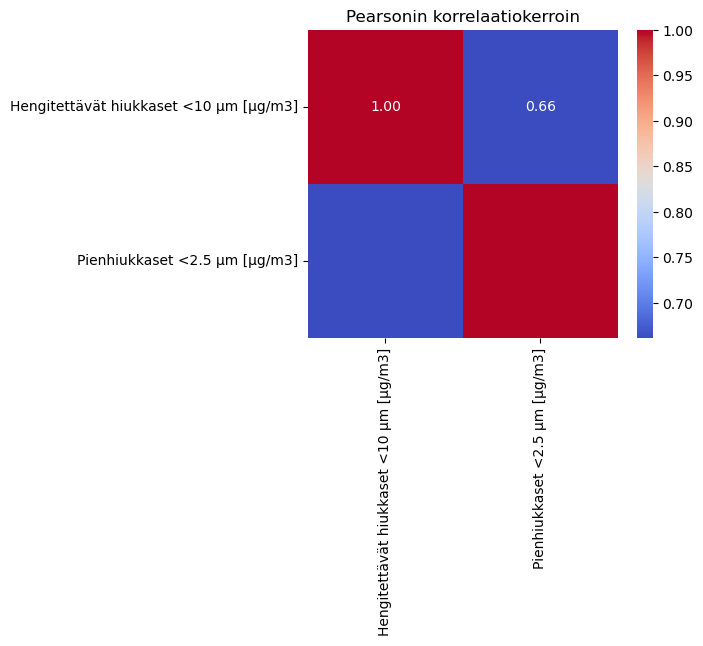

In [62]:
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearsonin korrelaatiokerroin')
plt.show()

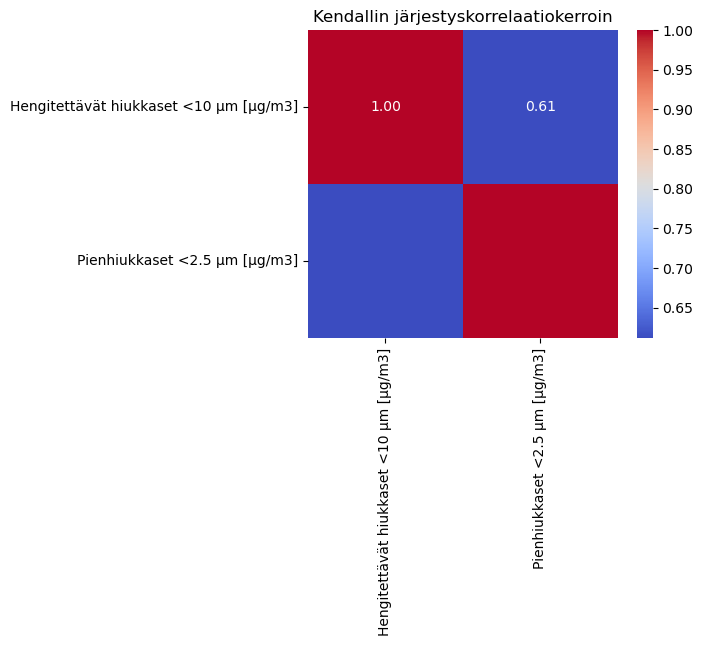

In [61]:
plt.figure(figsize=(5, 4))
sns.heatmap(kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Kendallin järjestyskorrelaatiokerroin')
plt.show()

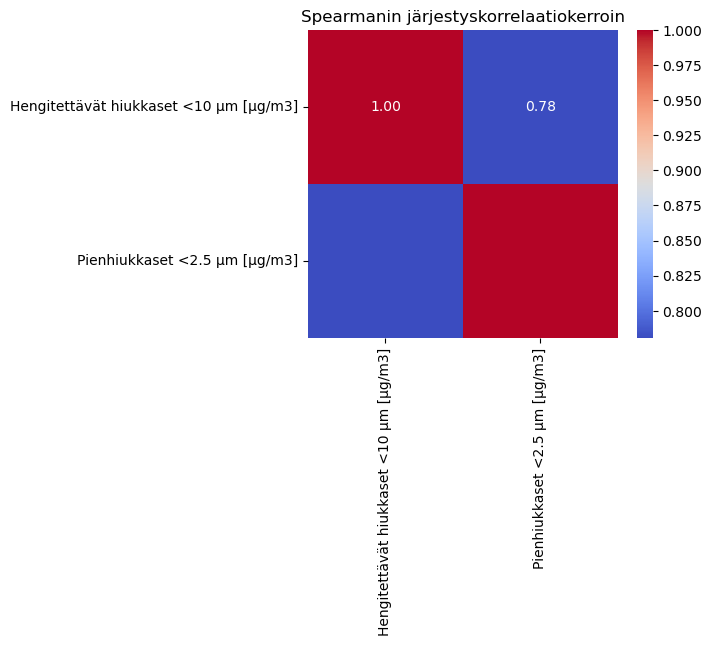

In [63]:

plt.figure(figsize=(5, 4))
sns.heatmap(spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearmanin järjestyskorrelaatiokerroin')
plt.show()